# Problem Set #4
## Name: Weiwei Zheng

### Problem 1 Multiple linear regression

***a) import data and replace missing value***

In [96]:
import pandas as pd
import numpy as np
df = pd.read_csv("Auto.csv", na_values = "?")

In [97]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [100]:
df.dropna(inplace = True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

***b) scatter plot***

In [103]:
df_quant = df.drop(['name'], axis=1)
df_quant.horsepower = pd.to_numeric(df_quant.horsepower)

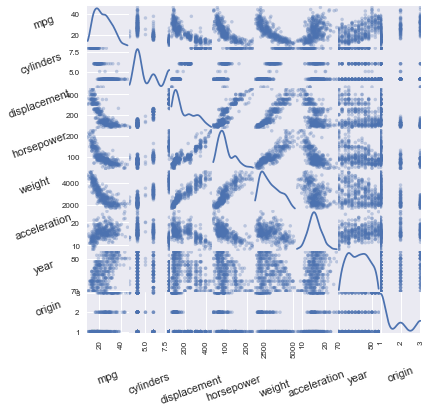

In [105]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('seaborn')

scatter = scatter_matrix(df_quant, alpha=0.3, figsize=(6, 6),diagonal= 'kde')
for i in range(8):
    ax = scatter[i, 0]
    ax.yaxis.label.set_rotation(20)
    ax.yaxis.labelpad = 25
    ax = scatter[7, i]
    ax.xaxis.label.set_rotation(20)
    ax.xaxis.labelpad = 20
plt.show()

***c) correlation matrix***

In [106]:
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


***d) multiple regression***

In [112]:
df_quant["constant"] = 1
import statsmodels.api as sm
reg1 = sm.OLS(endog=df_quant['mpg'], exog=df_quant[["constant","cylinders", "displacement", \
                                                    "horsepower", "weight", "acceleration",\
                                                    "year", "origin"]])

In [126]:
results1 = reg1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 02 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        01:53:42   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i.  $\beta_{4}$, $\beta_{6}$ and $\beta_{7}$ are statistically significant at 1% level.<br/>
ii. $\beta_{1}$, $\beta_{3}$ and $\beta_{5}$ are not statistically significant at 10% level.<br/>
iii. A one unit increase in vehcile year results in a predicted 0.75 unit increase in miles per gallon.

***e) non-linear relationship ***<br\>
displacement, horsepower and weight

In [131]:
for var in ["displacement", "horsepower", "weight", "acceleration"]:
    text = var + "_sqr"
    df_quant[text] = df_quant[var].apply(lambda x: x ** 2)

**i. new regression**

In [135]:
reg2 = sm.OLS(endog=df_quant['mpg'], exog=df_quant[["constant","cylinders", "displacement", \
                                                    "horsepower", "weight", "acceleration",\
                                                    "year", "origin", "displacement_sqr", \
                                                    "horsepower_sqr", "weight_sqr", "acceleration_sqr"]])
results2 = reg2.fit()

**ii. adjusted R squared**

In [136]:
print("adjusted r2 = {}".format(results2.rsquared_adj))
if results2.rsquared_adj > results1.rsquared_adj:
    print("It's better than the adjusted r2: {} in part d".format(results1.rsquared_adj))
else:
    print("It's worse than the adjusted r2: {} in part d".format(results1.rsquared_adj))

adjusted r2 = 0.8657483569790392
It's better than the adjusted r2: 0.8182237705835792 in part d


**iii. displacement**

In [137]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Fri, 02 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        02:00:11   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
constant            20.1084      6.696      3.003      0.003       6.943      33.274
cylinders            0.2519      0.326      0.773      0.440      -0.389       0.893
displacement        -0.0169      0.020     -0.828      0.408      -0.057       0.023
horsepower          -0.1635      0.041     -3.971      0.000      -0.244      -0.083
weight              -0.0136      0.003     -5.069      0.000      -0.019      -0.008
acceleration        -2.0884      0.557     -3.752      0.000      -3.183      -0.994
year                 0.7810      0.045     17.512      0.000       0.693       0.869
origin               0.6104      0.263      2.320      0.021       0.093       1.128
displacement_sqr  2.257e-05   3.61e-05      0.626      0.532   -4.83e-05    9.35e-05
horsepower_sqr       0.0004      0.000      2.943      0.003       0.000       0.001
weight_sqr        1.514e-06   3.69e-07      4.105      0.000    7.89e-07    2.24e-06
acceleration_sqr     0.0576      0.016      3.496      0.001       0.025       0.090
==============================================================================
Omnibus:                       33.614   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.985
Skew:                           0.438   Prob(JB):                     1.16e-17
Kurtosis:                       5.002   Cond. No.                     5.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The statistical significance of displacement becomes larger than 1% (from p = 0.008 to p = 0.408), and the significant level of its squared term is also large (p = 0.523).

** iv. cylinders ** <br/>
The statistical significance of cylinders drops to lower than 10% level, with p-value changing from 0.128 to 0.003.

**v. prediction**

In [140]:
pred = results2.predict(exog=[1, 6, 200, 100, 3100, 15.1, 99, 1, 200 ** 2, 100 ** 2, 3100 ** 2, 15.1 ** 1])

In [143]:
print("The estimated mpg is {}".format(pred[0]))

The estimated mpg is 26.478914323302796


### Problem 2 K Nearest Neighbour

***a) calculate Euclidean distance***

In [160]:
def calculate_distance(observation):
    x1, x2, x3 = observation
    return np.sqrt(x1 ** 2 + x2 ** 2 + x3 ** 2)

In [161]:
observations  = [[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]]
for point in observations:
    print(calculate_distance(point))

3.0
2.0
3.16227766017
2.2360679775
1.41421356237
1.73205080757


***b) K = 1 ***

Green. If K = 1, the predicted value of $X_{i}$ = (0, 0, 0) should be the same with its cloest observation 
in the sample, <br/>which is $X_{5}$ = (-1, 0, 1) with distance = 1.41.

***c) K = 3 ***

Red. If K = 3, to predict the value of $X_{i}$ = (0, 0, 0), three closest neighbours of $X_{i}$ should be selected, which are $X_{2}$ = (2, 0, 0) with distance = 2, $X_{5}$ = (-1, 0, 1) with distance = 1.41 and $X_{6}$ = (1, 1, 1) with distance = 1.73, and choose the value with the largest probability in the group. So the value should be red.

***d) highly non-linear***

If the Bayes decision boundary is highly non_linear, the predicted bound should allow for larger variance to decrease bias error, which means the predicted bound should be less smooth. Then the K should be small to gurantee predictive accuracy. 

*** e) predict value for $X_{j}$ = (1, 1, 1) ***

In [192]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors = 2)
X = observations
Y = ["Red", "Red", "Red", "Green", "Green", "Red"]
knn.fit(X, Y)
result = knn.predict([[1, 1, 1]])
print(result[0])

Green


In [194]:
knn.kneighbors([[1, 1, 1]])

(array([[ 0.        ,  1.41421356]]), array([[5, 3]], dtype=int64))

The nearest neighbours are $X_{6}$ = (1, 1, 1) and $X_{4}$ = (0, 1, 2), with distances of 0 and 1.4. The two observations have different colours, so the predicted color of $X_{i}$ = (1, 1, 1) should be the same with the closer one, which is RED. 

### Problem 3 Multivariable Logistic Regression

In [212]:
def binary_mpg(mpg):
    crit = df_quant["mpg"].median()
    if mpg >= crit:
        new_mpg = 1
    else:
        new_mpg = 0
    return new_mpg

df_quant["mpg_bi"] = df_quant["mpg"].apply(binary_mpg)

*** a) *** estimate regression

In [233]:
X = ["constant","cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
LogitModel = sm.Logit(endog = df_quant["mpg_bi"], exog = df_quant[X])

In [214]:
result_logit = LogitModel.fit()
result_logit.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 mpg_bi   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Fri, 02 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        03:37:33   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Weight (p-value = 0.000) and year (p-value = 0.000) have coefficients that are statistically significant at the 5% level.

*** b) Split the data ***

In [234]:
from sklearn.cross_validation import train_test_split
X_2 = X[1:]
X_train, X_test, y_train, y_test = train_test_split(df_quant[X_2], \
                                                    df_quant["mpg_bi"], test_size = 0.5, random_state=10)

*** c) estimate on training set ***

In [315]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
B1, B2, B3, B4, B5, B6, B7 = LogReg.coef_[0].tolist()
B0 = LogReg.intercept_[0]
s = "B0 = {}, B1 = {}, B2 = {}, B3 = {}, B4 = {}, B5 = {}, B6 = {}, B7 = {}"
print(s.format(B0, B1, B2, B3, B4, B5, B6, B7))

B0 = -0.09787891591492155, B1 = -0.8154223174669682, B2 = 0.007489214675752109, B3 = -0.044629192593956375, B4 = -0.004834605799036407, B5 = -0.22758513586973345, B6 = 0.3246922367649802, B7 = -0.14996396499870102


*** d) predicting value ***

In [317]:
y_pred = LogReg.predict(X_test)

In [325]:
from sklearn.metrics import confusion_matrix, classification_report
result_matrix = confusion_matrix(y_test, y_pred)
result_matrix

array([[86, 13],
       [12, 85]], dtype=int64)

In [323]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



The model predicts mpg_high = 0 better, because it predicts higher proportion of correct mpg_high = 0 than mgp_high = 1.